In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import random
import plotly.express as px
import time
import seaborn as sns

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_500','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Warszawa,Wola,mazowieckie,52.245982,20.985385,wtorny,36.00,2,parter,3,1956.0,496000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,13777.777778,490
1,Kraków,Swoszowice,małopolskie,49.991389,19.946389,wtorny,78.32,3,3,3,2014.0,538000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,6869.254341,394
2,Łódź,Śródmieście,łódzkie,51.772914,19.458331,wtorny,60.27,2,2,3,1910.0,270000.0,https://gratka.pl/nieruchomosci/mieszkanie-lod...,4479.840717,152
3,Warszawa,Stara Ochota,mazowieckie,52.218900,20.978800,wtorny,122.00,4,6,7,2020.0,1955000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,16024.590164,215
4,Kraków,Mistrzejowice,małopolskie,50.096196,20.009887,wtorny,48.07,3,3,4,1978.0,384000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,7988.350322,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,Warszawa,Wola,mazowieckie,52.237222,20.960556,pierwotny,109.00,4,12,13,2020.0,1460000.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,13394.495413,159
54463,Warszawa,Wola,mazowieckie,52.237222,20.960556,wtorny,82.60,4,4,5,2020.0,885000.0,https://gratka.pl/nieruchomosci/4-pokojowe-got...,10714.285714,159
54464,Poznań,Grunwald,wielkopolskie,52.392626,16.846137,wtorny,68.25,3,parter,4,2009.0,540000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7912.087912,197
54465,Kraków,Os. Prądnik Czerwony,małopolskie,50.088513,19.958912,wtorny,45.00,2,2,10,2019.0,610000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,13555.555556,468


## data preparation for ann

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            54467 non-null  object 
 1   district        54467 non-null  object 
 2   voivodeship     46557 non-null  object 
 3   localization_y  54467 non-null  float64
 4   localization_x  54467 non-null  float64
 5   market          54467 non-null  object 
 6   area            54467 non-null  float64
 7   rooms           54467 non-null  object 
 8   floor           54467 non-null  object 
 9   floors          54467 non-null  object 
 10  build_yr        54467 non-null  float64
 11  price           54467 non-null  float64
 12  url             54467 non-null  object 
 13  price_of_sqm    54467 non-null  float64
 14  cluster         54467 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 6.0+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','area','price','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market        54467 non-null  object 
 1   rooms         54467 non-null  object 
 2   floor         54467 non-null  object 
 3   floors        54467 non-null  object 
 4   build_yr      54467 non-null  float64
 5   price_of_sqm  54467 non-null  float64
 6   cluster       54467 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.9+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,build_yr,price_of_sqm,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,1956.0,13777.777778,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014.0,6869.254341,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1910.0,4479.840717,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020.0,16024.590164,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1978.0,7988.350322,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,2020.0,13394.495413,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54463,2020.0,10714.285714,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54464,2009.0,7912.087912,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54465,2019.0,13555.555556,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame.price_of_sqm.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train= scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(40850, 573)

In [18]:
X_test.shape

(13617, 573)

In [19]:
X_train

array([[0.56818182, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.83333333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93560606, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98484848, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98484848, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.89772727, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

## creating model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=X_test.shape[1]))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                9184      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 9,673
Trainable params: 9,673
Non-trainable params: 0
_________________________________________________________________


In [23]:
# from tensorflow.keras.callbacks import EarlyStopping

In [24]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [25]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=5000,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 40850 samples, validate on 13617 samples
Epoch 1/5000
40850/40850 [==============================] - 1s 29us/sample - loss: 100744525.1576 - val_loss: 102737607.9089
Epoch 2/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 85267654.0596 - val_loss: 60308987.6219
Epoch 3/5000
40850/40850 [==============================] - ETA: 0s - loss: 28910213.91 - 1s 13us/sample - loss: 27779026.2592 - val_loss: 17138174.4606
Epoch 4/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 14682036.1225 - val_loss: 15262344.0783
Epoch 5/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 13150013.0978 - val_loss: 13863907.2635
Epoch 6/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 11875169.6870 - val_loss: 12496928.7116
Epoch 7/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 10544088.9089 - val_loss: 11135509.2923
Epoch 8/5000
40850/40850 [==============================]

Epoch 134/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5306134.2847 - val_loss: 5991859.7407
Epoch 135/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5303531.7503 - val_loss: 5991451.1959
Epoch 136/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5301700.1076 - val_loss: 5999310.3865
Epoch 137/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5302026.6434 - val_loss: 6009159.4256
Epoch 138/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5303437.8652 - val_loss: 5999329.9831
Epoch 139/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5302131.3448 - val_loss: 6016055.8887
Epoch 140/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5307804.4185 - val_loss: 5991961.7492
Epoch 141/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5302767.9326 - val_loss: 5991371.5129
Epoch 142/5000
4

40850/40850 [==============================] - 0s 12us/sample - loss: 5292735.6603 - val_loss: 5992927.6943
Epoch 267/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5292397.9709 - val_loss: 5996941.8843
Epoch 268/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5295875.5588 - val_loss: 6004880.8111
Epoch 269/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5296384.1455 - val_loss: 5991210.9891
Epoch 270/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5293573.9113 - val_loss: 5992686.4954
Epoch 271/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5294290.9151 - val_loss: 5989978.0079
Epoch 272/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5294330.8682 - val_loss: 5988539.4347
Epoch 273/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5294250.8038 - val_loss: 5999086.6026
Epoch 274/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 5291829.8659 - val_loss: 5999062.0711
Epoch 399/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5289594.0986 - val_loss: 5990796.2648
Epoch 400/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5287036.2604 - val_loss: 6000760.0071
Epoch 401/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5291209.8898 - val_loss: 5992009.8763
Epoch 402/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5293110.1497 - val_loss: 5996445.6483
Epoch 403/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5291222.4666 - val_loss: 5989304.6826
Epoch 404/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5289009.3079 - val_loss: 5992336.9624
Epoch 405/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5290946.0677 - val_loss: 5994725.6897
Epoch 406/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 5288696.4674 - val_loss: 5990800.8752
Epoch 531/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5288811.2060 - val_loss: 5991659.9309
Epoch 532/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5284575.9636 - val_loss: 5988822.2731
Epoch 533/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5287749.9542 - val_loss: 5990911.1966
Epoch 534/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5285184.3048 - val_loss: 5989571.6361
Epoch 535/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5286246.8801 - val_loss: 6007555.1587
Epoch 536/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5285071.6397 - val_loss: 5995743.7893
Epoch 537/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5286274.9054 - val_loss: 6040364.2162
Epoch 538/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 5284392.3081 - val_loss: 5986431.4390
Epoch 663/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5283141.1720 - val_loss: 5987631.5315
Epoch 664/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5286635.3996 - val_loss: 5999871.7289
Epoch 665/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5287894.7027 - val_loss: 5985979.3544
Epoch 666/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5281615.9590 - val_loss: 5987567.7497
Epoch 667/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5283405.8703 - val_loss: 5987930.6286
Epoch 668/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5282214.1386 - val_loss: 5989249.7208
Epoch 669/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5286555.5420 - val_loss: 5988714.5195
Epoch 670/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 5276655.1959 - val_loss: 5986201.2319
Epoch 795/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5281656.1017 - val_loss: 5990065.7023
Epoch 796/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5279277.1157 - val_loss: 5985423.1201
Epoch 797/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5278528.0249 - val_loss: 5985867.4729
Epoch 798/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5281571.8980 - val_loss: 5991193.9032
Epoch 799/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5279533.2159 - val_loss: 5994113.8595
Epoch 800/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5279824.6867 - val_loss: 5989439.3529
Epoch 801/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5282487.0104 - val_loss: 5986674.9719
Epoch 802/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 5276562.7262 - val_loss: 5984180.2470
Epoch 927/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5277305.6654 - val_loss: 5985687.7748
Epoch 928/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5279395.9178 - val_loss: 5984691.5809
Epoch 929/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5279005.1119 - val_loss: 5995877.5500
Epoch 930/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5278033.8910 - val_loss: 5986612.8485
Epoch 931/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5278728.5809 - val_loss: 5986319.5193
Epoch 932/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5278215.2683 - val_loss: 5992163.3599
Epoch 933/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5277483.1091 - val_loss: 5985633.2991
Epoch 934/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 5275554.4084 - val_loss: 5982398.9502
Epoch 1059/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5271425.3913 - val_loss: 5987318.1187
Epoch 1060/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5271984.5569 - val_loss: 5987262.0902
Epoch 1061/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5273394.3907 - val_loss: 5986364.7412
Epoch 1062/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5273190.9870 - val_loss: 5982469.1085
Epoch 1063/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5275184.3941 - val_loss: 5982877.4831
Epoch 1064/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5272314.4195 - val_loss: 5990605.0593
Epoch 1065/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5275065.9971 - val_loss: 5989001.2070
Epoch 1066/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 5265480.5735 - val_loss: 5986510.5848
Epoch 1191/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5264162.8894 - val_loss: 5983405.3427
Epoch 1192/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5262598.4357 - val_loss: 5985142.8275
Epoch 1193/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5264390.7733 - val_loss: 5994381.2846
Epoch 1194/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5263036.7095 - val_loss: 5977966.0293
Epoch 1195/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5265226.3906 - val_loss: 5977684.8814
Epoch 1196/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5260601.5146 - val_loss: 5975065.3402
Epoch 1197/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5262865.7868 - val_loss: 5975813.9777
Epoch 1198/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 5247582.1670 - val_loss: 5971173.2685
Epoch 1323/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5255360.9388 - val_loss: 5966832.4342
Epoch 1324/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5247093.7716 - val_loss: 5968106.2274
Epoch 1325/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5247026.0928 - val_loss: 5967074.9344
Epoch 1326/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5248296.8050 - val_loss: 5967969.7020
Epoch 1327/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5246834.9839 - val_loss: 5971786.5238
Epoch 1328/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5246246.5947 - val_loss: 5970903.3291
Epoch 1329/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5246361.0505 - val_loss: 5965366.3383
Epoch 1330/5000
40850/40

Epoch 1388/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5242950.8307 - val_loss: 5973913.7013
Epoch 1389/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5237542.4571 - val_loss: 5964992.4233
Epoch 1390/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5235813.3321 - val_loss: 5962828.1024
Epoch 1391/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5240129.4337 - val_loss: 5992093.1094
Epoch 1392/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5238346.6365 - val_loss: 5964204.5263
Epoch 1393/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5236560.8762 - val_loss: 5962154.8531
Epoch 1394/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5235159.3981 - val_loss: 5963893.9256
Epoch 1395/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5238426.3980 - val_loss: 5972082.2475
Epoch 13

40850/40850 [==============================] - 1s 13us/sample - loss: 5231998.5997 - val_loss: 5970577.8574
Epoch 1455/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5229540.5510 - val_loss: 5970503.9549
Epoch 1456/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5226503.1671 - val_loss: 5967703.1759
Epoch 1457/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5228005.8347 - val_loss: 5973002.0368
Epoch 1458/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5230523.7422 - val_loss: 5963351.0191
Epoch 1459/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5228370.1419 - val_loss: 5965361.2650
Epoch 1460/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5227955.9997 - val_loss: 5959469.2544
Epoch 1461/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5225945.6300 - val_loss: 5966902.5372
Epoch 1462/5000
40850/40

Epoch 1586/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 5211327.6603 - val_loss: 5956783.0968
Epoch 1587/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5212210.3954 - val_loss: 5954441.0657
Epoch 1588/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 5213023.7823 - val_loss: 5955694.3309
Epoch 1589/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5215565.2060 - val_loss: 5960679.4403
Epoch 1590/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5213033.2015 - val_loss: 5993229.2842
Epoch 1591/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5214806.6336 - val_loss: 5957447.2125
Epoch 1592/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5214276.4295 - val_loss: 5955715.0875
Epoch 1593/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5213188.2835 - val_loss: 5960538.8508
Epoch 15

40850/40850 [==============================] - 1s 17us/sample - loss: 5205100.0365 - val_loss: 5955027.5348
Epoch 1653/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 5207515.2579 - val_loss: 5960605.5686
Epoch 1654/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 5208284.4603 - val_loss: 5955067.4615
Epoch 1655/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 5206998.7276 - val_loss: 5953592.8708
Epoch 1656/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5204727.2914 - val_loss: 5954480.9121
Epoch 1657/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5205688.2194 - val_loss: 5963051.1293
Epoch 1658/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5206077.5345 - val_loss: 5954746.3535
Epoch 1659/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5208430.2992 - val_loss: 5979633.4401
Epoch 1660/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 5180036.7736 - val_loss: 5944450.1301
Epoch 1785/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5178109.2607 - val_loss: 5945083.8590
Epoch 1786/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5178572.2941 - val_loss: 5931907.1848
Epoch 1787/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5179399.5006 - val_loss: 5938212.7408
Epoch 1788/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5178575.7295 - val_loss: 5940479.6804
Epoch 1789/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5177690.5507 - val_loss: 5929924.9280
Epoch 1790/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5179166.9420 - val_loss: 5931638.5785
Epoch 1791/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5176789.7204 - val_loss: 5929830.9767
Epoch 1792/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 5138910.5502 - val_loss: 5894634.7840
Epoch 1917/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5134993.7787 - val_loss: 5893736.0884
Epoch 1918/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5133208.0855 - val_loss: 5887846.5772
Epoch 1919/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5133097.8735 - val_loss: 5888101.0705
Epoch 1920/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5128881.2518 - val_loss: 5888124.4060
Epoch 1921/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5130111.7737 - val_loss: 5889570.3587
Epoch 1922/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5128150.4006 - val_loss: 5888169.1327
Epoch 1923/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5129334.2988 - val_loss: 5887351.7312
Epoch 1924/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 5038247.5691 - val_loss: 5810151.7394
Epoch 2049/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5035665.8550 - val_loss: 5811664.6294
Epoch 2050/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5039226.3646 - val_loss: 5808838.2932
Epoch 2051/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5036110.1186 - val_loss: 5810029.6328
Epoch 2052/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5034819.4993 - val_loss: 5818469.2959
Epoch 2053/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5034442.0430 - val_loss: 5808803.3208
Epoch 2054/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5035196.5424 - val_loss: 5833456.6427
Epoch 2055/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5034738.7363 - val_loss: 5807646.0138
Epoch 2056/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 4981055.4186 - val_loss: 5800435.4533
Epoch 2180/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4981153.3687 - val_loss: 5775755.0194
Epoch 2181/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4977719.8969 - val_loss: 5790613.8814
Epoch 2182/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4977496.7306 - val_loss: 5773316.8077
Epoch 2183/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4975693.1812 - val_loss: 5795867.5813
Epoch 2184/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4977279.2362 - val_loss: 5784768.2274
Epoch 2185/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4977694.2555 - val_loss: 5777801.0709
Epoch 2186/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 4977333.7058 - val_loss: 5773274.1443
Epoch 2187/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4956661.7604 - val_loss: 5767439.2976
Epoch 2312/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4953141.8111 - val_loss: 5760947.9871
Epoch 2313/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4952964.0616 - val_loss: 5759882.1324
Epoch 2314/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4950704.6761 - val_loss: 5761334.3013
Epoch 2315/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4949202.4362 - val_loss: 5762979.8414
Epoch 2316/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4953606.3629 - val_loss: 5767314.1567
Epoch 2317/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4950530.4752 - val_loss: 5762734.4620
Epoch 2318/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4952885.9939 - val_loss: 5761473.9555
Epoch 2319/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4925846.2954 - val_loss: 5756887.1938
Epoch 2444/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4926827.4861 - val_loss: 5754712.3770
Epoch 2445/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4926842.4966 - val_loss: 5754954.6782
Epoch 2446/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4926017.5853 - val_loss: 5753779.3551
Epoch 2447/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4925151.3578 - val_loss: 5765156.2824
Epoch 2448/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4928437.7322 - val_loss: 5757210.8515
Epoch 2449/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4923811.5587 - val_loss: 5754054.5283
Epoch 2450/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4925025.3169 - val_loss: 5755422.3394
Epoch 2451/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4904716.4729 - val_loss: 5757644.8506
Epoch 2576/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4900588.9430 - val_loss: 5758021.6776
Epoch 2577/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4900444.1892 - val_loss: 5742452.5887
Epoch 2578/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4903320.4061 - val_loss: 5743022.2790
Epoch 2579/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4903556.3182 - val_loss: 5752756.2357
Epoch 2580/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4898754.3213 - val_loss: 5747125.3961
Epoch 2581/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 4900151.6624 - val_loss: 5752586.5867
Epoch 2582/5000
40850/40850 [==============================] - 1s 22us/sample - loss: 4900472.6633 - val_loss: 5773503.4007
Epoch 2583/5000
40850/40

40850/40850 [==============================] - 1s 12us/sample - loss: 4872151.3185 - val_loss: 5735538.3770
Epoch 2708/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4872308.1368 - val_loss: 5732970.0843
Epoch 2709/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4871478.6237 - val_loss: 5744317.0876
Epoch 2710/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4871789.6613 - val_loss: 5735141.7815
Epoch 2711/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4874652.2447 - val_loss: 5728664.1720
Epoch 2712/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4872461.2626 - val_loss: 5732367.4732
Epoch 2713/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4869827.2423 - val_loss: 5732748.9985
Epoch 2714/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4870153.3722 - val_loss: 5733604.9436
Epoch 2715/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4758834.0050 - val_loss: 5680730.3490
Epoch 2840/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4754621.0217 - val_loss: 5689991.8928
Epoch 2841/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4754757.6860 - val_loss: 5682292.3294
Epoch 2842/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4752821.3823 - val_loss: 5676801.9035
Epoch 2843/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4753750.1626 - val_loss: 5671822.6996
Epoch 2844/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4738538.2274 - val_loss: 5680541.7177
Epoch 2845/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4738226.6750 - val_loss: 5669046.8279
Epoch 2846/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4731905.0035 - val_loss: 5659380.2437
Epoch 2847/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4495678.6347 - val_loss: 5522512.9899
Epoch 2972/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4498712.0483 - val_loss: 5540344.6685
Epoch 2973/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4492727.7004 - val_loss: 5525186.3128
Epoch 2974/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4493841.4454 - val_loss: 5524499.9565
Epoch 2975/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4495743.4822 - val_loss: 5523929.8309
Epoch 2976/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4493216.6207 - val_loss: 5521186.7966
Epoch 2977/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4493014.5783 - val_loss: 5538458.6023
Epoch 2978/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4492657.2461 - val_loss: 5527119.4285
Epoch 2979/5000
40850/40

Epoch 3037/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4456427.2667 - val_loss: 5522597.4301
Epoch 3038/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4460314.0715 - val_loss: 5505491.1882
Epoch 3039/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4458222.7906 - val_loss: 5507367.7424
Epoch 3040/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4459358.5336 - val_loss: 5518596.6678
Epoch 3041/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4453706.1385 - val_loss: 5512256.5138
Epoch 3042/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4454557.0021 - val_loss: 5513414.5467
Epoch 3043/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4451668.7025 - val_loss: 5511370.7676
Epoch 3044/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4452900.0083 - val_loss: 5539823.3337
Epoch 30

40850/40850 [==============================] - 1s 14us/sample - loss: 4431935.8372 - val_loss: 5500199.3617
Epoch 3104/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4429844.2574 - val_loss: 5510756.2067
Epoch 3105/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4431432.6944 - val_loss: 5516929.1252
Epoch 3106/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4433468.1580 - val_loss: 5500796.7973
Epoch 3107/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4430190.4682 - val_loss: 5515947.8867
Epoch 3108/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4430021.9942 - val_loss: 5503644.8364
Epoch 3109/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4431892.0524 - val_loss: 5503328.9753
Epoch 3110/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4430265.5308 - val_loss: 5503135.9515
Epoch 3111/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4392002.1579 - val_loss: 5487708.9355
Epoch 3236/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 4390818.1378 - val_loss: 5488134.5126
Epoch 3237/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4389884.2760 - val_loss: 5510409.8459
Epoch 3238/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4388283.3700 - val_loss: 5490530.2230
Epoch 3239/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4394120.3581 - val_loss: 5495893.9672
Epoch 3240/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4390807.4899 - val_loss: 5498786.1393
Epoch 3241/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4391058.3042 - val_loss: 5499470.2886
Epoch 3242/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4388981.5537 - val_loss: 5489917.2112
Epoch 3243/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4350456.7190 - val_loss: 5455240.6225
Epoch 3368/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4348423.8172 - val_loss: 5461156.4117
Epoch 3369/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4348623.2481 - val_loss: 5462406.9410
Epoch 3370/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4350521.5256 - val_loss: 5454104.1040
Epoch 3371/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4348262.9930 - val_loss: 5453959.6536
Epoch 3372/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4350989.7388 - val_loss: 5456317.9018
Epoch 3373/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4345877.1351 - val_loss: 5464531.9024
Epoch 3374/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4349035.1097 - val_loss: 5461265.4655
Epoch 3375/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 4317496.7861 - val_loss: 5468057.6203
Epoch 3500/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4320507.9458 - val_loss: 5434695.9894
Epoch 3501/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4317709.0489 - val_loss: 5440538.8863
Epoch 3502/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4315570.1596 - val_loss: 5445941.3875
Epoch 3503/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4316119.0776 - val_loss: 5439473.9768
Epoch 3504/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4315632.5777 - val_loss: 5434826.2664
Epoch 3505/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4312657.8573 - val_loss: 5439436.7933
Epoch 3506/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4315496.3829 - val_loss: 5445330.2165
Epoch 3507/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4279388.8601 - val_loss: 5409407.3563
Epoch 3632/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4276774.2528 - val_loss: 5411356.2914
Epoch 3633/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4274431.7450 - val_loss: 5416617.7222
Epoch 3634/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4272444.9590 - val_loss: 5412827.8638
Epoch 3635/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4269570.1750 - val_loss: 5413916.9120
Epoch 3636/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4270373.3722 - val_loss: 5410371.9408
Epoch 3637/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4273084.9072 - val_loss: 5441994.2180
Epoch 3638/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4269748.5823 - val_loss: 5431398.2341
Epoch 3639/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4226834.7703 - val_loss: 5411003.2163
Epoch 3764/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4228474.2623 - val_loss: 5410636.5592
Epoch 3765/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4223152.9134 - val_loss: 5392838.4104
Epoch 3766/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4223414.9795 - val_loss: 5405153.3658
Epoch 3767/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4224833.5700 - val_loss: 5396792.3675
Epoch 3768/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4227816.2395 - val_loss: 5388408.9965
Epoch 3769/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4225544.1169 - val_loss: 5382814.2521
Epoch 3770/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4226103.6496 - val_loss: 5398743.6407
Epoch 3771/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4169521.1127 - val_loss: 5393156.0540
Epoch 3896/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4166538.4894 - val_loss: 5377370.1247
Epoch 3897/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4164565.2331 - val_loss: 5377228.5148
Epoch 3898/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4165622.7358 - val_loss: 5368706.2060
Epoch 3899/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4162849.0111 - val_loss: 5372437.7571
Epoch 3900/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4163991.1564 - val_loss: 5371332.2837
Epoch 3901/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4165013.9228 - val_loss: 5376096.3694
Epoch 3902/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4162935.8697 - val_loss: 5395580.8991
Epoch 3903/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4138826.2935 - val_loss: 5384998.7051
Epoch 4028/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4130568.5928 - val_loss: 5392607.3842
Epoch 4029/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4129204.0151 - val_loss: 5379068.3758
Epoch 4030/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4136608.5626 - val_loss: 5390452.0072
Epoch 4031/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4137177.3072 - val_loss: 5382866.2459
Epoch 4032/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4128861.0959 - val_loss: 5383689.0782
Epoch 4033/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4132565.7754 - val_loss: 5373484.4668
Epoch 4034/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4128923.0601 - val_loss: 5383326.8369
Epoch 4035/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4092994.8472 - val_loss: 5364610.6502
Epoch 4160/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4093372.9217 - val_loss: 5366213.4737
Epoch 4161/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4091893.9956 - val_loss: 5373753.8295
Epoch 4162/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4092436.4238 - val_loss: 5370455.2249
Epoch 4163/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4092229.8474 - val_loss: 5381419.2960
Epoch 4164/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4091832.2068 - val_loss: 5369521.5022
Epoch 4165/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4093099.1201 - val_loss: 5384329.7783
Epoch 4166/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4092998.2923 - val_loss: 5375082.5318
Epoch 4167/5000
40850/40

Epoch 4225/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4071408.3829 - val_loss: 5419885.4272
Epoch 4226/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4071594.8060 - val_loss: 5371413.0771
Epoch 4227/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4075370.3704 - val_loss: 5387254.2523
Epoch 4228/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4069778.1948 - val_loss: 5395530.0789
Epoch 4229/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4078421.7705 - val_loss: 5373254.7724
Epoch 4230/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4073242.2732 - val_loss: 5370617.7359
Epoch 4231/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4063249.9917 - val_loss: 5379213.4634
Epoch 4232/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4065171.5096 - val_loss: 5372993.1167
Epoch 42

Epoch 4291/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4047815.9766 - val_loss: 5366741.3066
Epoch 4292/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4044842.9292 - val_loss: 5361032.8966
Epoch 4293/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4053166.4070 - val_loss: 5363523.9007
Epoch 4294/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4044817.1769 - val_loss: 5362975.3092
Epoch 4295/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4047622.9924 - val_loss: 5358018.2516
Epoch 4296/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4049374.0054 - val_loss: 5359392.8976
Epoch 4297/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4049328.1009 - val_loss: 5356484.0341
Epoch 4298/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4044502.4325 - val_loss: 5361974.0552
Epoch 42

40850/40850 [==============================] - 1s 14us/sample - loss: 4031616.5128 - val_loss: 5349564.6165
Epoch 4358/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4024345.1975 - val_loss: 5367356.8820
Epoch 4359/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4027605.8153 - val_loss: 5362235.7210
Epoch 4360/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4024324.8513 - val_loss: 5353224.7868
Epoch 4361/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4025684.5017 - val_loss: 5370846.1819
Epoch 4362/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4029152.7986 - val_loss: 5356057.5847
Epoch 4363/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4026695.8161 - val_loss: 5351569.8837
Epoch 4364/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4027918.0747 - val_loss: 5366662.1363
Epoch 4365/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 3998676.8721 - val_loss: 5352075.4758
Epoch 4490/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3999007.9903 - val_loss: 5364079.1219
Epoch 4491/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3998626.1517 - val_loss: 5341526.4336
Epoch 4492/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3996804.9157 - val_loss: 5358450.6455
Epoch 4493/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3992111.0570 - val_loss: 5377302.8746
Epoch 4494/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3998012.6077 - val_loss: 5340522.1467
Epoch 4495/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3997452.2160 - val_loss: 5340435.6607
Epoch 4496/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3993688.5641 - val_loss: 5342207.3203
Epoch 4497/5000
40850/40

Epoch 4555/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3976199.5608 - val_loss: 5330535.8838
Epoch 4556/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3979587.2426 - val_loss: 5338924.8244
Epoch 4557/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3983567.0364 - val_loss: 5357576.3912
Epoch 4558/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3977734.4264 - val_loss: 5346863.0301
Epoch 4559/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3978908.7141 - val_loss: 5325826.9522
Epoch 4560/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3981121.9422 - val_loss: 5350005.8504
Epoch 4561/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3976115.3319 - val_loss: 5336620.6060
Epoch 4562/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 3975684.5591 - val_loss: 5331208.8916
Epoch 45

40850/40850 [==============================] - 0s 11us/sample - loss: 3959515.0301 - val_loss: 5334654.5034
Epoch 4622/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3954981.1557 - val_loss: 5323968.5390
Epoch 4623/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3959701.2885 - val_loss: 5359321.4858
Epoch 4624/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3963807.1869 - val_loss: 5334661.3576
Epoch 4625/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3957257.3979 - val_loss: 5327692.7990
Epoch 4626/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3955457.4353 - val_loss: 5348734.5642
Epoch 4627/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3958240.8804 - val_loss: 5334388.5914
Epoch 4628/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3964228.4522 - val_loss: 5329133.8698
Epoch 4629/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 3930226.8317 - val_loss: 5312170.5072
Epoch 4754/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3929698.3935 - val_loss: 5312281.6491
Epoch 4755/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3934556.0744 - val_loss: 5404220.1838
Epoch 4756/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3933297.1551 - val_loss: 5322262.0524
Epoch 4757/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3934488.4158 - val_loss: 5317749.4258
Epoch 4758/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3932998.4633 - val_loss: 5306039.2359
Epoch 4759/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3936803.1759 - val_loss: 5383847.6035
Epoch 4760/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3928952.2237 - val_loss: 5303451.7629
Epoch 4761/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 3911314.2493 - val_loss: 5294744.3170
Epoch 4885/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3909783.0032 - val_loss: 5302529.6222
Epoch 4886/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3912474.3548 - val_loss: 5344284.1548
Epoch 4887/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3911520.0171 - val_loss: 5294071.3893
Epoch 4888/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3908529.6111 - val_loss: 5302188.0018
Epoch 4889/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3911886.0400 - val_loss: 5293763.4489
Epoch 4890/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3914735.4108 - val_loss: 5309419.4290
Epoch 4891/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 3909032.3230 - val_loss: 5341475.7040
Epoch 4892/5000
40850/40

In [26]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

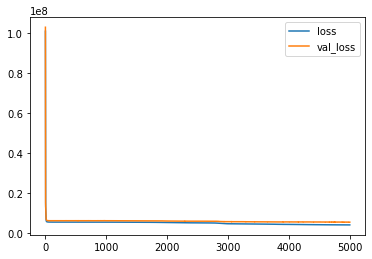

In [27]:
losses.plot()

(0.0, 10000000.0)

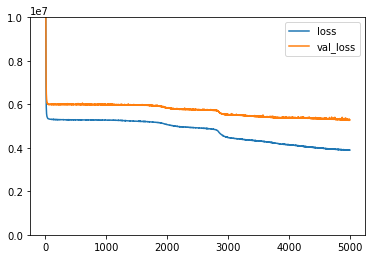

In [28]:
losses.plot()
plt.ylim(0,10000000)

## model ewaluation

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
predictions = model.predict(X_test)

In [31]:
mean_absolute_error(y_test,predictions)

1398.7768621602304

In [32]:
np.sqrt(mean_squared_error(y_test,predictions))

2296.090467311224

In [33]:
r2_score(y_test,predictions)

0.7079990669418255

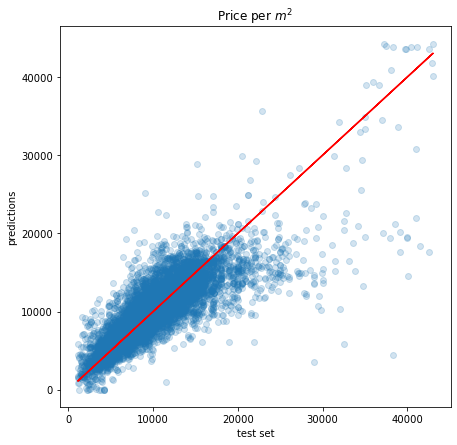

In [34]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(x=y_test,y=predictions,edgecolor=None,alpha=0.2)
plt.xlabel('test set')
plt.ylabel('predictions')
plt.title('Price per $m^{2}$')

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [35]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

<AxesSubplot:ylabel='Count'>

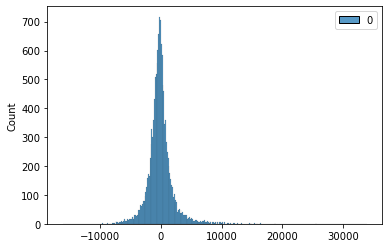

In [36]:
# plt.xlim(-200000,200000)

sns.histplot(errors)

In [37]:
predictions.reshape(y_test.shape[0])[:20]

array([ 5562.0303, 11018.085 , 13486.489 , 12711.541 ,  7102.7476,
        9541.55  ,  7236.082 ,  5551.3564, 11158.857 , 12533.913 ,
        6198.0044,  8965.012 , 13199.324 ,  9311.595 , 10547.265 ,
        7512.322 , 12722.338 ,  7082.412 ,  6308.0664, 13763.726 ],
      dtype=float32)

In [38]:
y_test[:20]

array([ 5202.8774358 , 10005.26592944, 13000.        , 12624.38734591,
        5039.49447077, 11341.22287968,  7538.2803298 ,  5497.5       ,
        9683.05003971, 13913.21656051,  7666.66666667, 10555.55555556,
       19322.58064516,  1592.039801  , 10212.76595745,  7000.        ,
       13941.51712304,  5817.39130435,  7800.        , 12900.        ])

In [39]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

array([1.06902966, 1.1012286 , 1.03742225, 1.0069036 , 1.40941668,
       0.84131578, 0.95991151, 1.00979653, 1.15241142, 0.9008638 ,
       0.80843536, 0.8493169 , 0.68310359, 5.84884544, 1.032753  ,
       1.07318883, 0.91255046, 1.217455  , 0.80872646, 1.06695547])

## saving data

In [40]:
from datetime import datetime
from tensorflow.keras.models import load_model
timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")
model.save('models_ann\\' + '500_' + timestamp)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models_ann\500_2021-01-12--13-55\assets


In [41]:
import joblib
joblib.dump(scaler, 'scaler_500')

['scaler_500']